# Emotion Classification in short texts with BERT

Applying BERT to the problem of multiclass text classification. Our dataset consists of written dialogs, messages and short stories. Each dialog utterance/message is labeled with one of the five emotion categories: joy, anger, sadness, fear, neutral.

## Workflow:
1. Import Data
2. Data preprocessing and downloading BERT
3. Training and validation
4. Saving the model

Multiclass text classification with BERT and [ktrain](https://github.com/amaiya/ktrain). Use google colab for a free GPU

👋  **Let's start**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install ktrain on Google Colab
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 64.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 72.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

## 1. Import Data

In [4]:
path = '/content/drive/MyDrive/Project/Project4MSc/data'
data_train = pd.read_csv(path + '/data_train.csv', encoding='utf-8')
data_test = pd.read_csv(path + '/data_test.csv', encoding='utf-8')

X_train = data_train.Text.tolist()
X_test = data_test.Text.tolist()

y_train = data_train.Emotion.tolist()
y_test = data_test.Emotion.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']

print('size of training set: %s' % (len(data_train['Text'])))
print('size of validation set: %s' % (len(data_test['Text'])))
print(data.Emotion.value_counts())

data.head(10)

size of training set: 7934
size of validation set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
5,sadness,When my family heard that my Mother's cousin w...
6,joy,Finding out I am chosen to collect norms for C...
7,anger,A spokesperson said : ` Glen is furious that t...
8,neutral,Yes .
9,sadness,"When I see people with burns I feel sad, actua..."


In [5]:
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'neutral': 4
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

## 2. Data preprocessing

* The text must be preprocessed in a specific way for use with BERT. This is accomplished by setting preprocess_mode to ‘bert’. The BERT model and vocabulary will be automatically downloaded

* BERT can handle a maximum length of 512, but let's use less to reduce memory and improve speed.

In [6]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350,
                                                                       max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


## 2. Training and validation


Loading the pretrained BERT for text classification

In [7]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


Wrap it in a Learner object

In [8]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

In [15]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
 403/1323 [========>.....................] - ETA: 8:05 - loss: 0.1105 - accuracy: 0.9694

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Train the model. More about tuning learning rates [here](https://github.com/amaiya/ktrain/blob/master/tutorial-02-tuning-learning-rates.ipynb)

In [9]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
1323/1323 [==============================] - 868s 637ms/step - loss: 0.9265 - accuracy: 0.6410 - val_loss: 0.5819 - val_accuracy: 0.7955
Epoch 2/3
1323/1323 [==============================] - 841s 636ms/step - loss: 0.4599 - accuracy: 0.8419 - val_loss: 0.5187 - val_accuracy: 0.8270
Epoch 3/3
1323/1323 [==============================] - 841s 636ms/step - loss: 0.1959 - accuracy: 0.9415 - val_loss: 0.5713 - val_accuracy: 0.8249


In [10]:
# collect historical data during the training process
history = learner.history

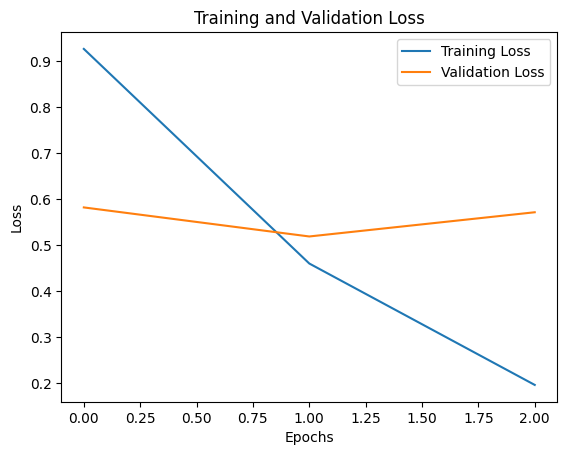

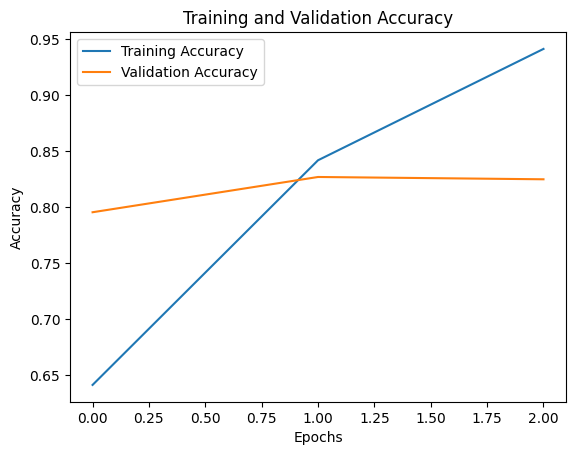

In [11]:
import matplotlib.pyplot as plt

# Draw Loss function curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Draw accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Validation

In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

107/107 [==============================] - 96s 856ms/step
              precision    recall  f1-score   support

         joy       0.87      0.83      0.85       707
     sadness       0.80      0.83      0.82       676
        fear       0.86      0.85      0.86       679
       anger       0.82      0.78      0.80       693
     neutral       0.79      0.84      0.82       638

    accuracy                           0.83      3393
   macro avg       0.83      0.83      0.83      3393
weighted avg       0.83      0.83      0.83      3393



array([[590,  18,  15,  15,  69],
       [ 16, 562,  31,  45,  22],
       [ 20,  30, 578,  35,  16],
       [ 22,  65,  33, 538,  35],
       [ 34,  27,  13,  26, 538]])

#### Testing with other inputs

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['joy', 'sadness', 'fear', 'anger', 'neutral']

In [ ]:
import time

# message = 'I just broke up with my boyfriend'
message = 'How would you feel if I gave you your copy in person?'

start_time = time.time()
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: neutral (0.11)


## 4. Saving Bert model


In [ ]:
# let's save the predictor for later use
# predictor.save("models/bert_model")
predictor.save("/content/drive/MyDrive/Project/Project4MSc/models/bert_model")

Done! to reload the predictor use: ktrain.load_predictor